In [1]:
import pandas as pd
import numpy as np 

from clean import clean_json
from scrape import scrape_multiple_years
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [2]:
import matplotlib.image as image
file = './img/attack_zone.png'
logo = image.imread(file)

In [3]:
input_path = os.path.join('.\datasets','2016_to_2020.json')
output_path = os.path.join('.\datasets','2016_to_2020.csv')

df = clean_json(input_path, output_path)
df.head(40)

ValueError: Could not reserve memory block

In [125]:
df_1 = df.copy()

In [126]:
def find_net(period : int, home_team : str, attacking_team: str) :
    if attacking_team == home_team :
        if (period == 1) | (period == 3) :
            return 'right'
        else :
            return 'left'
    else :
        if (period == 1) | (period == 3):
            return 'left'
        else :
            return 'right'


def change_coordinate(coordinate_x : float, attacking_team : str, home_team : str, period : int):
    """This function determines the net where the attacking team shoots during the play
      and then computes the distance to the net"""
    
    net_side = find_net(period, home_team, attacking_team)
    # Cas où le filet sur lequel l'équipe tire se trouve sur la droite
    if net_side == 'right' :
        new_x_coordinate = coordinate_x
    else : 
        # Cas où le filet sur lequel l'équipe tire se trouve sur la gauche
        new_x_coordinate = np.abs(coordinate_x)
    return new_x_coordinate

In [127]:
df_1['x_coordinate'] = df_1.apply(lambda row : change_coordinate(row['x_coordinate'], row['attacking_team_name'], row['home_team'], row['period']), axis = 1)

In [128]:
df_1.head(40)

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
0,1,REGULAR,01:11,2016020001,10,Toronto Maple Leafs,Shot,Mitchell Marner,Craig Anderson,Wrist Shot,77.0,5.0,NaN,NaN,Ottawa Senators
1,1,REGULAR,02:53,2016020001,9,Ottawa Senators,Shot,Chris Kelly,Frederik Andersen,Wrist Shot,86.0,13.0,NaN,NaN,Ottawa Senators
2,1,REGULAR,04:01,2016020001,9,Ottawa Senators,Shot,Cody Ceci,Frederik Andersen,Wrist Shot,23.0,-38.0,NaN,NaN,Ottawa Senators
3,1,REGULAR,04:46,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-15.0,NaN,NaN,Ottawa Senators
4,1,REGULAR,06:46,2016020001,10,Toronto Maple Leafs,Shot,Martin Marincin,Craig Anderson,Wrist Shot,34.0,28.0,NaN,NaN,Ottawa Senators
5,1,REGULAR,07:30,2016020001,10,Toronto Maple Leafs,Shot,Mitchell Marner,Craig Anderson,Wrist Shot,33.0,-17.0,NaN,NaN,Ottawa Senators
6,1,REGULAR,08:21,2016020001,10,Toronto Maple Leafs,Goal,Auston Matthews,Craig Anderson,Wrist Shot,70.0,1.0,False,Even,Ottawa Senators
7,1,REGULAR,08:29,2016020001,10,Toronto Maple Leafs,Shot,Matt Martin,Craig Anderson,Wrist Shot,45.0,-36.0,NaN,NaN,Ottawa Senators
8,1,REGULAR,09:00,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-18.0,NaN,NaN,Ottawa Senators
9,1,REGULAR,10:16,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Wrist Shot,34.0,20.0,NaN,NaN,Ottawa Senators


In [129]:
df_2 = df_1[(df_1['attacking_team_name'] == "Ottawa Senators") & (df_1['play_type'] == "Shot")]
df_2.head(5)

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
1,1,REGULAR,02:53,2016020001,9,Ottawa Senators,Shot,Chris Kelly,Frederik Andersen,Wrist Shot,86.0,13.0,NaN,NaN,Ottawa Senators
2,1,REGULAR,04:01,2016020001,9,Ottawa Senators,Shot,Cody Ceci,Frederik Andersen,Wrist Shot,23.0,-38.0,NaN,NaN,Ottawa Senators
3,1,REGULAR,04:46,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-15.0,NaN,NaN,Ottawa Senators
8,1,REGULAR,09:00,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-18.0,NaN,NaN,Ottawa Senators
9,1,REGULAR,10:16,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Wrist Shot,34.0,20.0,NaN,NaN,Ottawa Senators


In [130]:
#gameId = np.unique(df_2['gameID'])
#print(gameId)
def saison(gameId):
    return int(gameId / 1000000)

In [131]:
df_2['gameID'] = df_2.gameID.apply(saison)
df_f = df_2[df_2['gameID'] == 2016 ]
print(df_2)

        period period_type period_time  gameID  attacking_team_id  \
1            1     REGULAR       02:53    2016                  9   
2            1     REGULAR       04:01    2016                  9   
3            1     REGULAR       04:46    2016                  9   
8            1     REGULAR       09:00    2016                  9   
9            1     REGULAR       10:16    2016                  9   
...        ...         ...         ...     ...                ...   
161422       3     REGULAR       15:03    2017                  9   
161423       3     REGULAR       16:03    2017                  9   
161424       3     REGULAR       16:39    2017                  9   
161426       3     REGULAR       17:28    2017                  9   
161428       3     REGULAR       18:26    2017                  9   

       attacking_team_name play_type            shooter             goalie  \
1          Ottawa Senators      Shot        Chris Kelly  Frederik Andersen   
2          Otta

C:\Users\Ulrich TEDONGMO\AppData\Local\Temp\ipykernel_15692\4083451842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['gameID'] = df_2.gameID.apply(saison)


In [132]:
df_3 = df_f[['x_coordinate', 'y_coordinate']]
df_3.head(5)

,x_coordinate,y_coordinate
1,86.0,13.0
2,23.0,-38.0
3,33.0,-15.0
8,33.0,-18.0
9,34.0,20.0


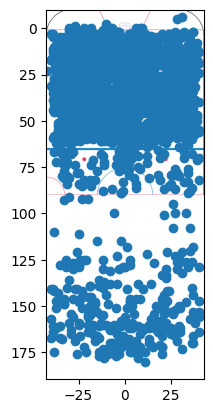

In [133]:
plt.imshow(logo, extent=[-42.5, 42.5, 90, -10])
plt.scatter(df_3['y_coordinate'], - df_3['x_coordinate'] + 90)

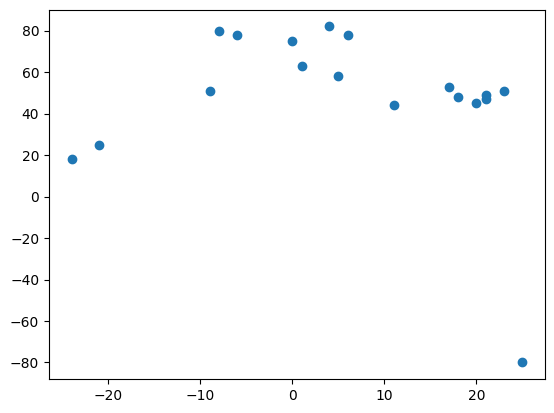

In [73]:
plt.scatter(df_3['y_coordinate'], df_3['x_coordinate'])

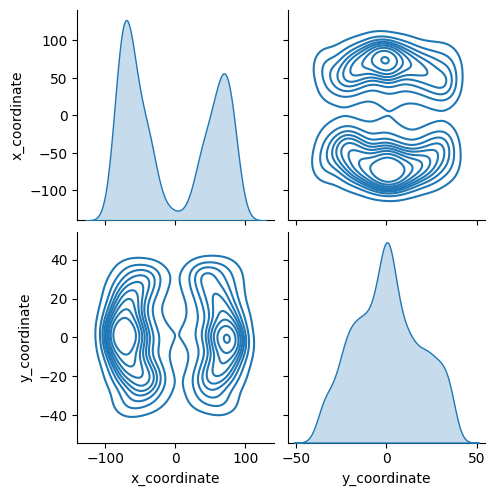

In [24]:
sns.pairplot(df_2, kind="kde")

(8500,)


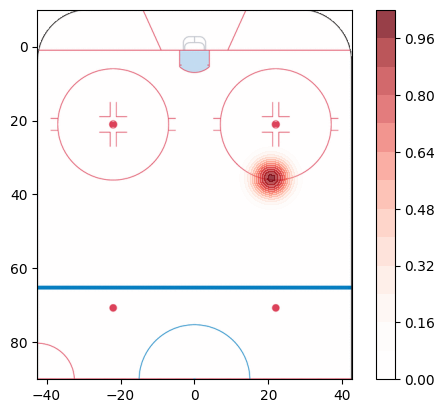

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import Image

#2D Gaussian function
def twoD_Gaussian(x, y, xo, yo, sigma_x, sigma_y):
    a = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    c = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    g = np.exp( - (a*((x-xo)**2) + c*((y-yo)**2)))
    return g.ravel()


def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap


#Use base cmap to create transparent
mycmap = transparent_cmap(plt.cm.Reds)


# Import image and get x and y extents
I = Image.open('./img/attack_zone.png')
y, x = np.mgrid[-10:90, -42.5:42.5]


#Plot image and overlay colormap
fig, ax = plt.subplots(1, 1)
ax.imshow(I, extent=[-42.5, 42.5, 90, -10])
Gauss = twoD_Gaussian(x, y, .5*x.max(), .4*y.max(), .1*x.max(), .1*y.max())
print(Gauss.shape)
cb = ax.contourf(x, y, Gauss.reshape(x.shape[0], y.shape[1]), 15, cmap=mycmap)
plt.colorbar(cb)
plt.show()